In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the training dataset
diabetes = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

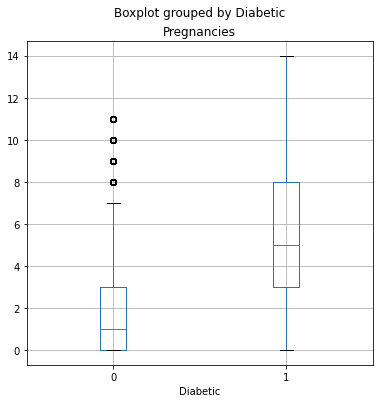

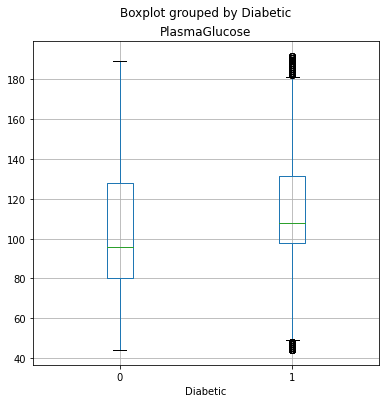

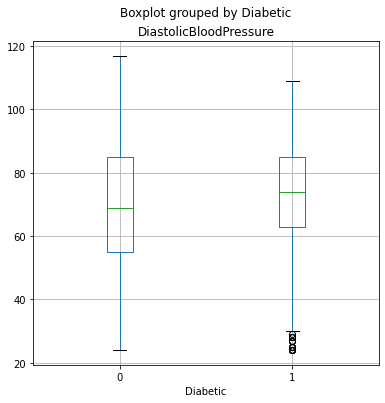

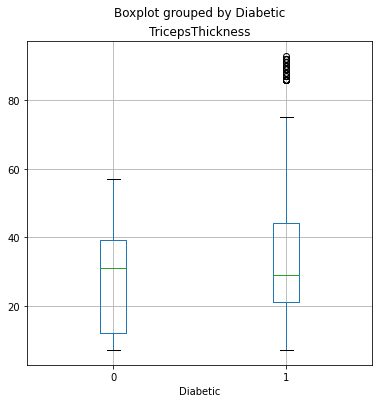

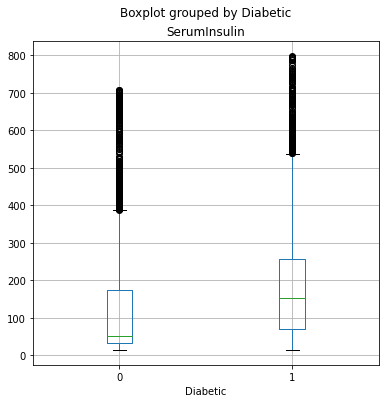

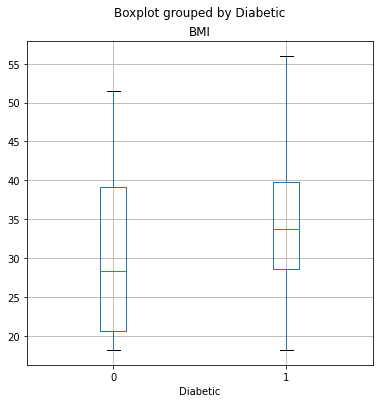

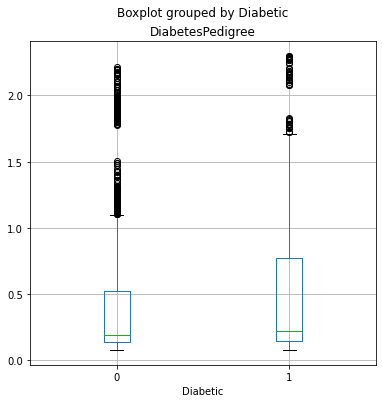

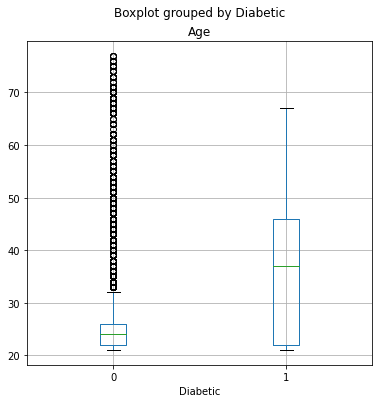

In [4]:
# Boxplot for all the features
for col in features:
    diabetes.boxplot(col, by = label, figsize=(6,6))
    plt.title(col)

In [5]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

,names,train_scores,test_scores,accuracy_scores,precision_scores,recall_scores,roc_auc_scores
3,Gradient boost,0.956857,0.945778,0.945778,0.925603,0.912153,0.988580
2,Random Forest,1.000000,0.932667,0.932667,0.908845,0.889036,0.981063
4,KNN Classifier,0.890762,0.832889,0.832889,0.776890,0.706077,0.886580
1,Decison Tree,1.000000,0.899778,0.899778,0.859851,0.838838,0.884757
6,SVM,0.810571,0.805556,0.805556,0.760816,0.615588,0.865152
0,Logistic,0.786762,0.789111,0.789111,0.724029,0.603038,0.856861
5,Naive Bayes,0.788762,0.789778,0.789778,0.717125,0.619551,0.853660


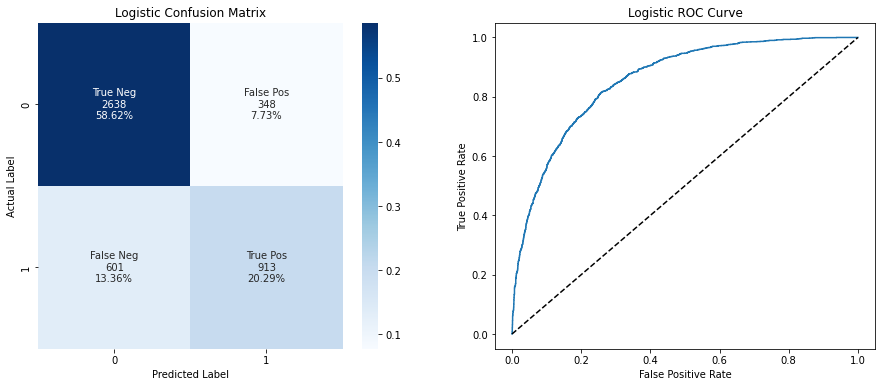

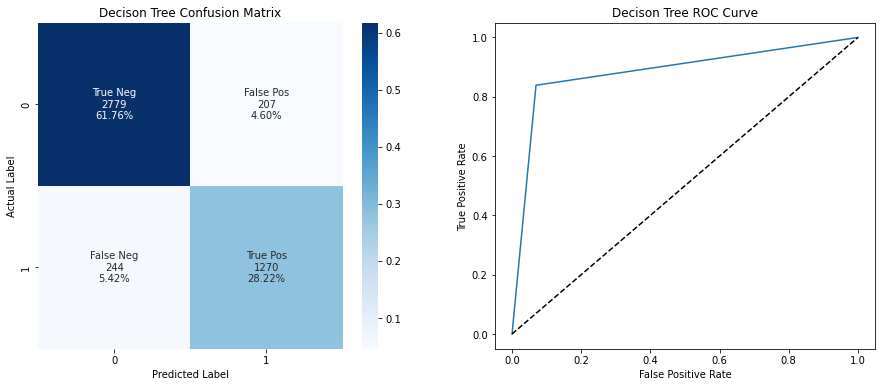

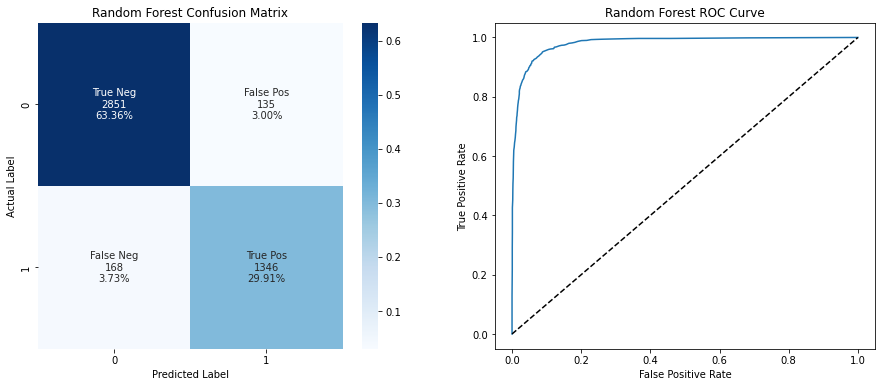

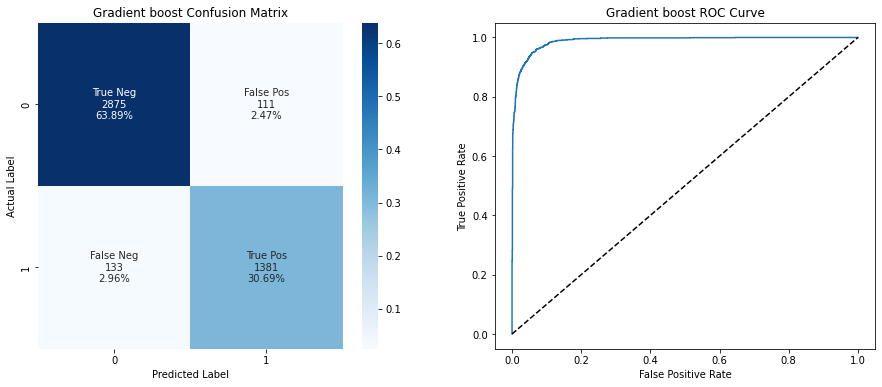

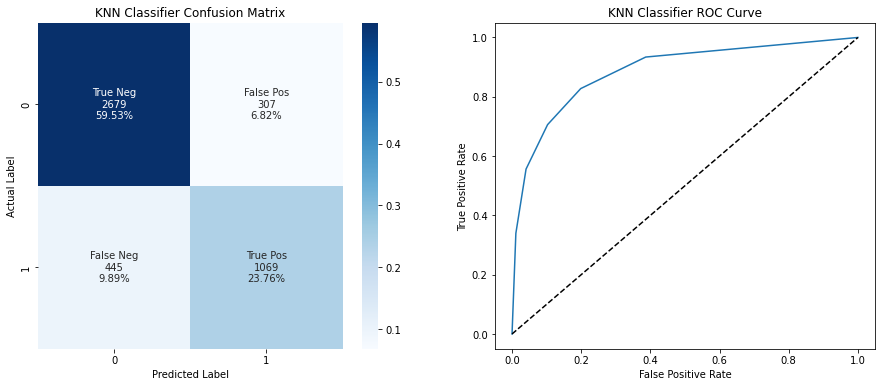

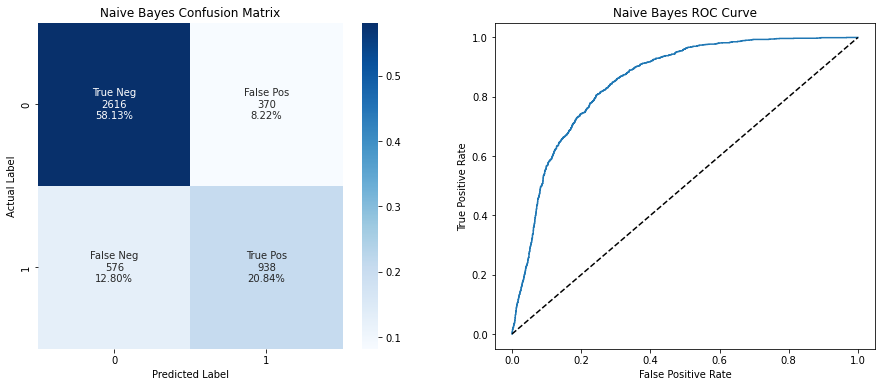

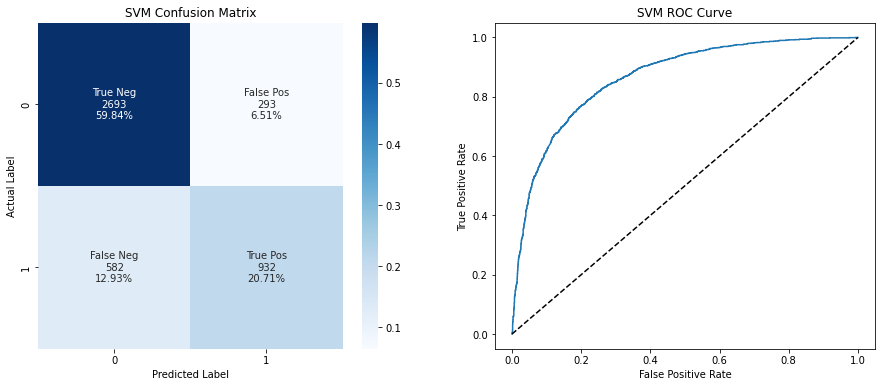

In [6]:
# Building all classification model and comparing the metrics. Also plottig customized confusion matrix and ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score


models = {'Logistic': LogisticRegression(C = 1/0.01,solver = "liblinear"),
'Decison Tree': DecisionTreeClassifier(),
'Random Forest': RandomForestClassifier(),
'Gradient boost' : GradientBoostingClassifier(),
'KNN Classifier': KNeighborsClassifier(),
'Naive Bayes': GaussianNB(),
'SVM': SVC(probability= True) }

names = []
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

for name, model in models.items():
    name_model = model
    
    name_fit = name_model.fit(X_train, y_train)

    name_pred = name_fit.predict(X_test)
    name_scores = name_fit.predict_proba(X_test)
    name_train_score = name_fit.score(X_train,y_train)
    name_test_score = name_fit.score(X_test, y_test)

    name_accuracy_score = accuracy_score(y_test, name_pred)
    name_precision_score = precision_score(y_test, name_pred)
    name_recall_score = recall_score(y_test, name_pred)
    name_roc_auc_score = roc_auc_score(y_test,name_scores[:,1])


    fig,ax = plt.subplots(1,2, figsize = (15,6))
    #Confusion Matrix
    cm = confusion_matrix(y_test, name_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm/np.sum(cm), annot= labels, fmt='', cmap = 'Blues', ax = ax[0])
    ax[0].set_title(name + ' Confusion Matrix')
    ax[0].set_ylabel('Actual Label')
    ax[0].set_xlabel('Predicted Label')

    #Roc curve
    fpr, tpr, thresholds = roc_curve(y_test, name_scores[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(name + ' ROC Curve')
    ax[1].plot([0,1],[0,1],'k--')

    # plt.plot(fpr,tpr)
    
    names.append(name)
    train_scores.append(name_train_score)
    test_scores.append(name_test_score)
    accuracy_scores.append(name_accuracy_score)
    precision_scores.append(name_precision_score)
    recall_scores.append(name_recall_score)
    roc_auc_scores.append(name_roc_auc_score)



    #print('Classfication report for the ' + name + ' Model')
    # print(classification_report(y_test,name_pred))
score_df = pd.DataFrame(list(zip(names,train_scores,test_scores, accuracy_scores,precision_scores, recall_scores, roc_auc_scores)), 
                    columns = ('names','train_scores','test_scores', 'accuracy_scores','precision_scores', 'recall_scores', 'roc_auc_scores'))
score_df.sort_values(by = 'roc_auc_scores', ascending = False)
